# Automated Content Management System of Employee Turnover Dataset Using SQL:


# Project's goal:

By analyzing the whole situation of employees' work, obtaining the turnover rate and stability of employees can improve the company's ability to optimize the management of employees and prevent the loss of talent.

# Data Source: 
   https://community.ibm.com/community/user/home

# Set Questions:


1. Staff personal information

2. Relationship among JobSatisfaction, MonthlyIncome and Attrition.

3.  Relationship among Department, OverTime, PerformanceRating and Attrition.

4. Relationship among job involvement，over time，marital situation and gender.

5. Relationship among marital situation，gender and attrition.

6. Relationship among age,years at company and attrition.

7. Relationship among environment satisfaction，distance from home，job satisfaction and attrition.



# Methods and Solutions:
1. Mount Google Drive and create a data folder to store the database and import library(sqlite3, pandas, numpy, matplotlib) in jupyter notebook.

2. Create a connection. To connect to a SQLite database from Python, we need to firstly create a connection.

3. Create Table. ‘connection’, ‘cursor’, ‘execute’ is the needed steps.

4. Read the CSV file of the dataset.

5. Open file path.

6. Query (Database implementation with Python and SQL query)

# Database tables:
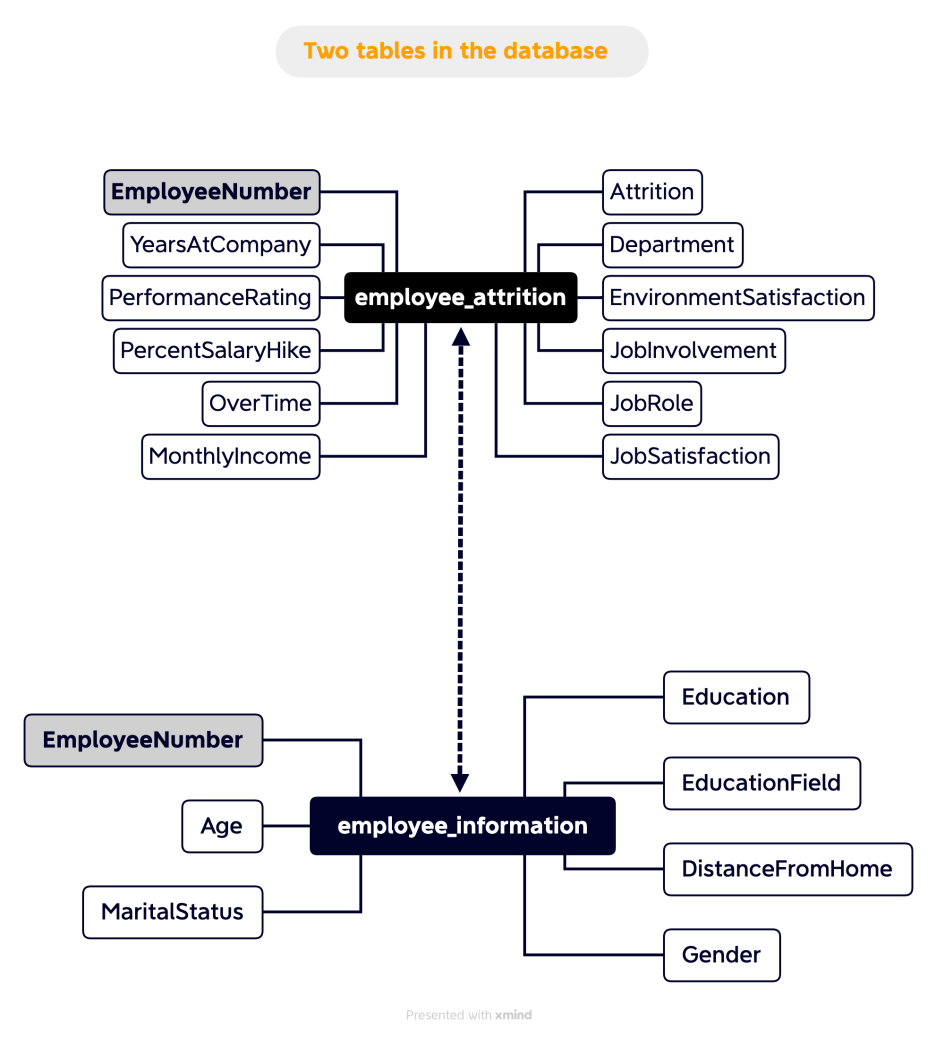

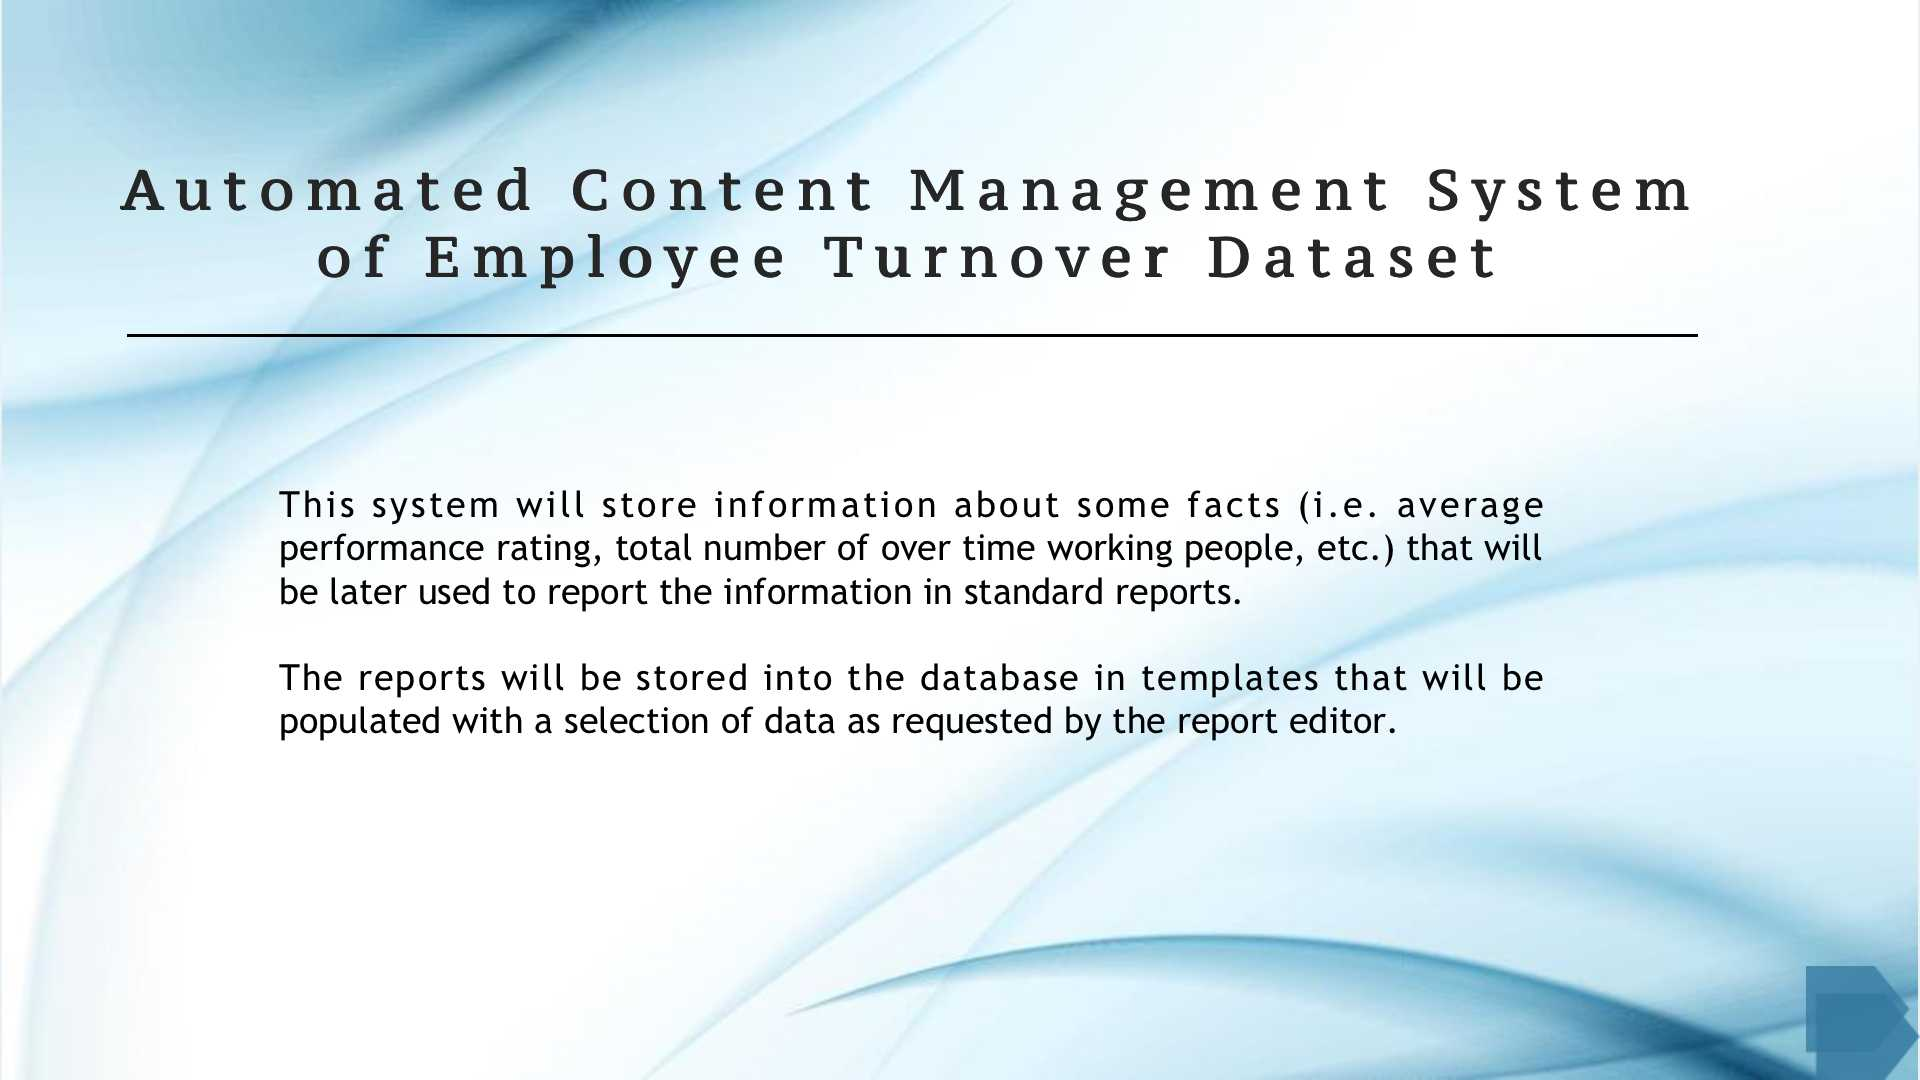



## 1. Preperation
Mount Google Drive and create a data folder to store the database.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, pathlib
dataPath = '/content/drive/MyDrive/Colab Notebooks/data/'
if not(os.path.exists(dataPath)):
    path = pathlib.Path(dataPath)
    path.mkdir(parents=True, exist_ok=True) # Can create the folders in the path if missing. No error if path exists
else:
    print('The data path you selected already exists')

The data path you selected already exists


In [ ]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import csv

## 2. Create a connection
To connect to a SQLite database from Python, we need to firstly create a connection.

When you connect to an SQLite database file that does not exist, SQLite automatically creates the **new database** for you.

In [ ]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

In [ ]:
database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
conn.close()

In [ ]:
employee_attrition = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/employee_attrition.csv')
employee_attrition

,EmployeeNumber,Attrition,Department,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,997,No,Research & Development,4,3,Research Director,4,17399,No,22,4,5
1,178,No,Research & Development,2,3,Manufacturing Director,2,4941,No,20,4,3
2,1780,Yes,Sales,2,3,Sales Representative,2,2679,No,13,3,1
3,644,No,Human Resources,1,3,Manager,2,18200,No,11,3,32
4,1118,No,Research & Development,2,3,Healthcare Representative,2,10445,No,19,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1024,1596,No,Research & Development,2,4,Laboratory Technician,3,3407,No,17,3,10
1025,1814,No,Research & Development,2,4,Healthcare Representative,2,6870,No,12,3,3
1026,1203,Yes,Research & Development,3,2,Research Scientist,4,2853,Yes,11,3,0
1027,2053,No,Research & Development,4,2,Laboratory Technician,2,4025,Yes,13,3,4


In [ ]:
employee_infomation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/employee_infomation.csv')
employee_infomation

,EmployeeNumber,Age,DistanceFromHome,Education,EducationField,Gender,MaritalStatus
0,997,50.0,1.0,2,Medical,Male,Divorced
1,178,36.0,6.0,2,Medical,Male,Divorced
2,1780,21.0,7.0,1,Marketing,Male,Single
3,644,50.0,NaN,3,Medical,Male,Married
4,1118,52.0,7.0,4,Life Sciences,Male,Single
...,...,...,...,...,...,...,...
1024,1596,NaN,28.0,3,Life Sciences,Male,Married
1025,1814,41.0,NaN,3,Life Sciences,Male,Single
1026,1203,22.0,NaN,4,Life Sciences,Male,Married
1027,2053,29.0,13.0,2,Other,Male,Married


In [ ]:
conn = create_connection(database)

cur = conn.cursor()

path1 = r"/content/drive/MyDrive/Colab Notebooks/data/employee_infomation.csv"
path2 = r"/content/drive/MyDrive/Colab Notebooks/data/employee_attrition.csv"


with open(path1,'r') as fin: 


         employee_infomation = csv.DictReader(fin) 
         to_db = [(i['EmployeeNumber'], i['Age'], i['DistanceFromHome'], i['Education'], i['EducationField'],i['Gender'], i['MaritalStatus']) for i in employee_infomation]




with open(path2,'r') as fin: 
         employee_attrition = csv.DictReader(fin)
         to_db = [(i['EmployeeNumber'], i['Attrition'], i['Department'], i['EnvironmentSatisfaction'], i['JobInvolvement'], i['JobRole'], i['JobSatisfaction'], i['MonthlyIncome'], i['OverTime'], i['PercentSalaryHike'], i['PerformanceRating'], i['YearsAtCompany']) for i in employee_attrition]




conn.commit()
conn.close()

## 3. Create Table
To create a new table in an SQLite database from a Python program, you use the following steps:

1. create a `Connection` object using the `connect()` function of `sqlite3`.
2. create a `Cursor` object by calling the `cursor()` method of the `Connection` object.
3. pass the CREATE TABLE statement to the `execute()` method of the `Cursor` object and execute this method.

# 4. Query

1. Create a `Cursor` object using the cursor method of the `Connection` object.
2. Execute a SELECT statement.
3. Call the `fetchall()` method of the `cursor` object to fetch the result data.
4. Finally, loop the cursor and process each row individually.


#1). Staff information

#2). Relationship among JobSatisfaction, MonthlyIncome and Attrition.

#3). Relationship among Department, OverTime, PerformanceRating and Attrition.


In [ ]:
database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

#Drop FLIGHTS table if already exists.
cur.execute("DROP TABLE IF EXISTS employee_infomation")
cur.execute("DROP TABLE IF EXISTS employee_attrition")

#Creating table as per requirement
sql1 ='''CREATE TABLE "employee_infomation" (
	"EmployeeNumber"	TEXT,
	"Age"	TEXT,
	"DistanceFromHome"	TEXT,
	"Education"	TEXT,
	"EducationField"	TEXT,
	"Gender"	TEXT,
	"MaritalStatus"	TEXT,
	PRIMARY KEY("EmployeeNumber")
)'''
cur.execute(sql1)

sql2 ='''CREATE TABLE "employee_attrition" (
	"EmployeeNumber"	TEXT,
	"Attrition"	TEXT,
	"Department"	TEXT,
	"EnvironmentSatisfaction"	TEXT,
	"JobInvolvement"	INTEGER,
	"JobRole"	TEXT,
	"JobSatisfaction"	TEXT,
	"MonthlyIncome"	TEXT,
	"OverTime"	TEXT,
	"PercentSalaryHike"	TEXT,
	"PerformanceRating"	TEXT,
	"YearsAtCompany"	TEXT,
	PRIMARY KEY("EmployeeNumber")
)'''

cur.execute(sql2)

conn.close()

In [ ]:
conn = create_connection(database)
cur = conn.cursor()

path1 = r"/content/drive/MyDrive/Colab Notebooks/data/employee_infomation.csv"
path2 = r"/content/drive/MyDrive/Colab Notebooks/data/employee_attrition.csv"


with open(path1,'r') as fin: 


         employee_infomation = csv.DictReader(fin) 
         to_db = [(i['EmployeeNumber'], i['Age'], i['DistanceFromHome'], i['Education'], i['EducationField'],i['Gender'], i['MaritalStatus']) for i in employee_infomation]

cur.executemany("INSERT INTO employee_infomation (EmployeeNumber, Age, DistanceFromHome,	Education,	EducationField,	Gender,	MaritalStatus) VALUES (?, ?, ?, ?, ?, ?, ?);", to_db)

with open(path2,'r') as fin: 
         employee_attrition = csv.DictReader(fin)
         to_db = [(i['EmployeeNumber'], i['Attrition'], i['Department'], i['EnvironmentSatisfaction'], i['JobInvolvement'], i['JobRole'], i['JobSatisfaction'], i['MonthlyIncome'], i['OverTime'], i['PercentSalaryHike'], i['PerformanceRating'], i['YearsAtCompany']) for i in employee_attrition]

cur.executemany("INSERT INTO employee_attrition (EmployeeNumber,	Attrition,	Department,	EnvironmentSatisfaction,	JobInvolvement,	JobRole,	JobSatisfaction,	MonthlyIncome,	OverTime,	PercentSalaryHike,	PerformanceRating,	YearsAtCompany) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);", to_db)


conn.commit()
conn.close()

---------------------------
Please choose following option:
1.  Relationship between JobSatisfaction, MonthlyIncome, Attrition
2.  Relationship between Department, OverTime, PerformanceRating, Attrition
3.  exit
Please enter your option: 1
All employees in the database now: 
Total 1029 people.
Please input the EmployeeNumber to print info: 2
                   
***************Report***************
                   
 The EmployeeNumber, Attrition, JobSatisfaction, MonthlyIncome are: [('2', 'No', '2', '5130')]
 Average MonthlyIncome of the whole company is:  (6449.796890184645,)
 Also, the total turnover number of the company is:  (176,)
                   
************Visualization************
                   


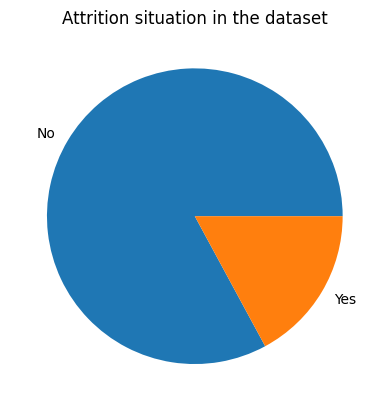

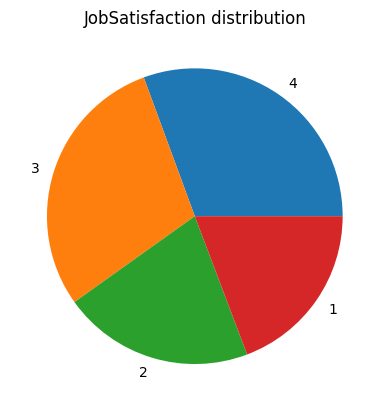

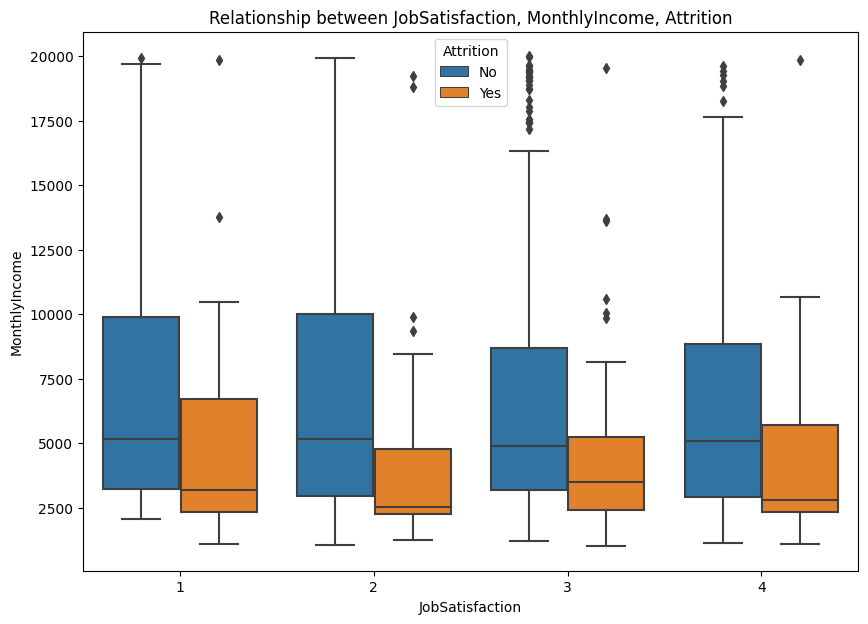

---------------------------
Please choose following option:
1.  Relationship between JobSatisfaction, MonthlyIncome, Attrition
2.  Relationship between Department, OverTime, PerformanceRating, Attrition
3.  exit
Please enter your option: 3


In [ ]:
from dataclasses import dataclass
import sqlite3
from sqlite3 import Error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


def showOptions():
    """ Show the options """
    choices = ["Relationship between JobSatisfaction, MonthlyIncome, Attrition", "Relationship between Department, OverTime, PerformanceRating, Attrition", "exit"]
    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])
    print("3. ", choices[2])


def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn


def listAllEmployee(conn):
    """
    List all employee in the database.
    """
    print("All employees in the database now: ")
    with conn:
        sql = "SELECT EmployeeNumber, Attrition, JobSatisfaction, MonthlyIncome FROM employee_attrition"
        cur = conn.cursor()
        cur.execute(sql)
        result_set = cur.fetchall()
   
        print("Total", len(result_set), "people.")



def printEmployeeInfo(EmployeeNumber, conn):
 #List EmployeeInfo

    with conn:
        sql = "SELECT EmployeeNumber, Attrition, JobSatisfaction, MonthlyIncome FROM employee_attrition WHERE EmployeeNumber=? "
        sql2 = "SELECT AVG(MonthlyIncome)  FROM employee_attrition"

        sql4 = "SELECT COUNT(Attrition)  FROM employee_attrition WHERE Attrition = 'Yes' "
  

        cur1 = conn.cursor()
        cur1.execute(sql, [EmployeeNumber])
        result_set = cur1.fetchall() 

        cur2 = conn.cursor()
        cur2.execute(sql2, [])
        result_set2 = cur2.fetchone()

        cur4 = conn.cursor()
        cur4.execute(sql4)
        result_set4 = cur4.fetchone()


        for result in result_set: 
          if result == None:
            print('No such employee.')
          else:
            print("=================================================================================================================")
            print("                   ")
            print("***************Report***************")
            print("                   ")
            print(' The EmployeeNumber, Attrition, JobSatisfaction, MonthlyIncome are:',result_set)
            print(' Average MonthlyIncome of the whole company is: ',result_set2)
            print(' Also, the total turnover number of the company is: ', result_set4 )
            print("                   ")
            print("************Visualization************")
            print("                   ")
            data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/employee_attrition.csv')
            
            plt.pie(data['Attrition'].value_counts(),labels=data['Attrition'].value_counts().keys())
            plt.title(label='Attrition situation in the dataset')
            plt.show()
            
            plt.pie(data['JobSatisfaction'].value_counts(),labels=data['JobSatisfaction'].value_counts().keys())
            plt.title(label='JobSatisfaction distribution')
            plt.show()

            plt.subplots(figsize=(10,7))
            sns.boxplot(x='JobSatisfaction', y='MonthlyIncome',data=data,hue='Attrition')
            plt.title(label='Relationship between JobSatisfaction, MonthlyIncome, Attrition')
            plt.show()


def printEmployee(conn):
    """
    Select out a Employee according to the EmployeeNumber.
    """
    listAllEmployee(conn)
    line = input("Please input the EmployeeNumber to print info: ")

    line = line.strip()

    printEmployeeInfo(line,conn)



def listAllDepartment(conn):
    """
    List all employee in the database.
    """
    print("All employees in the database now: ")
    with conn:
        sql = "SELECT EmployeeNumber, Department, OverTime, PerformanceRating, Attrition FROM employee_attrition"
        cur = conn.cursor()
        cur.execute(sql)
        result_set = cur.fetchall()
        print("Total", len(result_set), "people.")


def printDepartmentInfo(EmployeeNumber, conn):
 #List EmployeeInfo

    with conn:
        sql = "SELECT EmployeeNumber, Department, OverTime, PerformanceRating, Attrition FROM employee_attrition WHERE EmployeeNumber=? "

        sql2 = "SELECT AVG(PerformanceRating)  FROM employee_attrition"

        sql3 = "SELECT COUNT(OverTime)  FROM employee_attrition WHERE OverTime = 'Yes' "
  

        cur1 = conn.cursor()
        cur1.execute(sql, [EmployeeNumber])
        result_set = cur1.fetchall() 

        cur2 = conn.cursor()
        cur2.execute(sql2, [])
        result_set2 = cur2.fetchone()

        cur3 = conn.cursor()
        cur3.execute(sql3)
        result_set3 = cur3.fetchone()


        for result in result_set: 
          if result == None:
            print('No such employee.')
          else:
            print("=================================================================================================================")
            print("                   ")
            print("***************Report***************")
            print("                   ")
            print(' The EmployeeNumber, Department, OverTime, PerformanceRating, Attrition are:',result_set)
            print(' Average PerformanceRating of the whole company is: ',result_set2)
            print(' Also, The total number of overtime work of the whole company: ', result_set3)
            print("                   ")
            print("************Visualization************")
            print("                   ")
            data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/employee_attrition.csv')
            
            plt.pie(data['OverTime'].value_counts(),labels=data['OverTime'].value_counts().keys())
            plt.title(label='OverTime situation in the dataset')
            plt.show()

           
            plot_data = data.groupby(['OverTime','Department'])['Attrition'].value_counts(normalize=True)
            plot_data = plot_data.mul(100).rename('Percent').reset_index()
            fig = px.bar(plot_data, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="OverTime", category_orders={'Attrition': ['Yes', 'No']}) 
            fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', width=.4)
            fig.update_layout(title_text='Attrition Rates by Department and OverTime', yaxis_ticksuffix = '%',
                  height=500, xaxis=dict(tickangle=30))
            fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
            fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
            fig.show()


def printDepartment(conn):
    """
    Select out a Employee according to the EmployeeNumber.
    """
    listAllDepartment(conn)
    line = input("Please input the employee number to print info: ")
    line = line.strip()
    printDepartmentInfo(line,conn)




dataPath = '/content/drive/MyDrive/Colab Notebooks/data/'
database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
while True:
    showOptions()
    choice = input('Please enter your option: ')
    # with conn:
    if choice == '3':
        conn.close()
        break
    elif choice == '1':
        printEmployee(conn)
    elif choice == '2':
        printDepartment(conn)
    else:
        print("This option is not available")
        continue

*Analysis*
1.  Through the data visualization process, we can see that the current attrition rate is 17%.

2. The monthly income of the employees who have not resigned is generally higher than that of the employees who have resigned, and the overall distribution range of the monthly income of the employees who have not resigned is in a relatively high income range.

3. The over time rate is 28.9%.

4. The staff turnover rate of overtime working group is higher than that of non-overtime working group. Among the three departments, the department with the highest number of overtime workers is sales, and the lowest is human resources.


#4). Relationship among job involvement，over time，marital situation and gender.



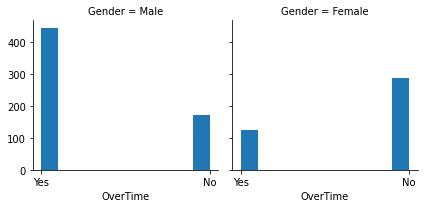

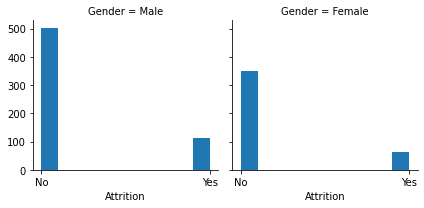

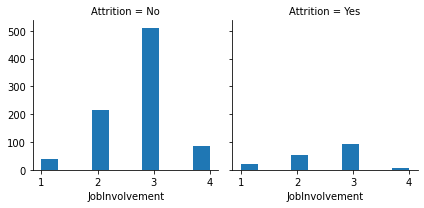

In [ ]:
g = sns.FacetGrid(data, col='Gender')
g = g.map(plt.hist, 'OverTime')
g = sns.FacetGrid(data, col='Gender')
g = g.map(plt.hist, 'Attrition')
g = sns.FacetGrid(data, col='Attrition')
g = g.map(plt.hist, 'JobInvolvement')

In [ ]:
print("Calculation of the Average Work Engagement Degree of female Marital Status and Employment Status")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

line = input("Please input Marital Status and Employment Status:")
values = line.split(',')
for i in range(0, len(values)):
        values[i] = values[i].strip()
def selectemployee(conn):
     """

    """
with conn:

        sql = "select avg(jobinvolvement) from employee_attrition A, employee_infomation I WHERE MaritalStatus = ? and Attrition = ? AND A.EmployeeNumber = I.EmployeeNumber AND Gender = 'Female'"
        cur = conn.cursor()
        cur.execute(sql, (values[0], values[1]))
        result_set = cur.fetchone()
        print("The average jobinvolvement degree of",values[0],"and", values[1],"attrition Female is",result_set[0])
conn.close()

Calculation of the Average Work Engagement Degree of female Marital Status and Employment Status
Please input Marital Status and Employment Status:Single,No
The average jobinvolvement degree of Single and No attrition Female is 2.73


#5). Relationship among marital situation，gender and attrition.


In [ ]:
print("Calculate the relationship between whether to work overtime and the proportion of employees in the working status")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

line = input("Please input overTime  and Attrition:")
values = line.split(',')
for i in range(0, len(values)):
        values[i] = values[i].strip()
line = input("Please input other overTime and Attrition:")
value = line.split(',')
for i in range(0, len(value)):
        value[i] = value[i].strip()
def selectemployee(conn):
     """

    """
with conn:

        sql = "select count(a.EmployeeNumber) from employee_attrition A, employee_infomation I WHERE Overtime = ? and Attrition = ? and a.EmployeeNumber=i.EmployeeNumber"
        cur = conn.cursor()
        cur.execute(sql, (values[0], values[1]))
        result_set = cur.fetchone()
        sql2 = "select count(a.EmployeeNumber) from employee_attrition A, employee_infomation I WHERE Overtime = ? and Attrition = ? and a.EmployeeNumber=i.EmployeeNumber "
        cur = conn.cursor()
        cur.execute(sql2, (value[0], value[1]))
        result_set2 = cur.fetchone()
        k=result_set[0]
        k2=result_set2[0]
        print(values[0],"overtime and",values[1],"attrition people is",(k/(k+k2))*100,"% of",value[0],"overtime and",value[1],"attrition people")
conn.close()

Calculate the relationship between whether to work overtime and the proportion of employees in the working status
Please input overTime  and Attrition:No,Yes
Please input other overTime and Attrition:Yes,Yes
No overtime and Yes attrition people is 43.75 % of Yes overtime and Yes attrition people


#6). Relationship among age,years at company and attrition.



In [ ]:
print("Check the average time and average age of active/leaving staff in the company")
attrition = input("please input the attrition:")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

def printmeanyears(conn):
    sql= "select avg(YearsAtCompany), avg(Age) from employee_attrition A, employee_infomation I where Attrition = ? AND A.EmployeeNumber = I.EmployeeNumber"
    cur.execute(sql, (attrition,))

    rows = cur.fetchall()
    for row in rows:
        print(row)

with conn:
    print("Average time in the company and average age of active/leaving staff")
    printmeanyears(conn)

conn.close()

Check the average time and average age of active/leaving staff in the company
please input the attrition:No
Average time in the company and average age of active/leaving staff
(7.368112543962486, 33.89800703399766)


In [ ]:
print("Check the employment status of people who have been with the company for more than 15 years and how old they are")
age = input("please input the age:")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

def select_all_age(conn):
    sql= "select I.EmployeeNumber, Attrition from employee_attrition A, employee_infomation I WHERE Age = ? and YearsAtCompany >= 15 AND A.EmployeeNumber = I.EmployeeNumber "
    cur.execute(sql, (age,))
    
    rows = cur.fetchall()
    for row in rows:
        print(row)

with conn:
    print("Incumbency of people who have been with the company for more than 15 years and how many years old")
    select_all_age(conn)

conn.close()

Check the employment status of people who have been with the company for more than 15 years and how old they are
please input the age:18
Incumbency of people who have been with the company for more than 15 years and how many years old


In [ ]:
print("Check the number of people who have been with the company for more than how many years and how old they are who have left")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

line = input("Please input year, age:")
values = line.split(',')
for i in range(0, len(values)):
        values[i] = values[i].strip()
def selectemployeenumbers(conn):
     """
    Given source and dest, select all the flights can arrive the dest directly. 
    For example, given HK, Tokyo, you may find a flight from HK -> Tokyo 
    Your job is to fill in this function.
    """
with conn:

        sql = "select count(Attrition) from employee_attrition A, employee_infomation I WHERE YearsAtCompany >= ? and Age = ? AND A.EmployeeNumber = I.EmployeeNumber AND Attrition = 'Yes'"
        cur = conn.cursor()
        cur.execute(sql, (values[0], values[1]))
        result_set = cur.fetchone()
        print("It is", result_set[0])
conn.close()

Check the number of people who have been with the company for more than how many years and how old they are who have left
Please input year, age:3,21
It is 1


# 7). Relationship among environment satisfaction，distance from home，job satisfaction and attrition.**

In [ ]:
print("Check the average distance from home for active/leaving staff and compare it with the average distance from home for all staff")
attrition1 = input("please input the attrition:")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

def printmeanyears(conn):
    sql= "SELECT avg (DistanceFromHome) FROM employee_infomation, employee_attrition WHERE Attrition=? AND employee_infomation.EmployeeNumber=employee_attrition.EmployeeNumber"
    cur.execute(sql, (attrition1,))

    rows = cur.fetchone()
    print(rows[0])

    sql1= "SELECT avg (DistanceFromHome) FROM employee_infomation"
    cur.execute(sql1)

    rows1 = cur.fetchone()
    print(rows1[0])
    
    print('diminish one another', rows[0] - rows1[0])
with conn:

    printmeanyears(conn)

conn.close()

Check the average distance from home for active/leaving staff and compare it with the average distance from home for all staff
please input the attrition:No
8.759671746776084
9.013605442176871
diminish one another -0.2539336954007876


In [ ]:
print("Check the number of leavers who are far away from home (option 3/4)")
attrition1 = input("please input the 3/4:")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

def printmeanyears(conn):
    sql= "SELECT EmployeeNumber FROM employee_infomation where DistanceFromHome= ? in(SELECT EmployeeNumber FROM employee_attrition WHERE Attrition='Yes')"
    cur.execute(sql, (attrition1,))

    rows = cur.fetchall()
    print(rows)

with conn:

    printmeanyears(conn)

conn.close()

Check the number of leavers who are far away from home (option 3/4)
please input the 3/4:3
[]


In [ ]:
print("Check the number of employees/leavers who are satisfied with their jobs and the environment, and what percentage of the total number of employees are satisfied")

database = dataPath + 'Employee turnover.db'
conn = create_connection(database)
#Creating a cursor object using the cursor() method
cur = conn.cursor()

line = input("Please input JobSatisfaction, Attrition, EnvironmentSatisfaction:")
values = line.split(',')
for i in range(0, len(values)):
        values[i] = values[i].strip()
def selectemployeenumbers(conn):
     """
    Given source and dest, select all the flights can arrive the dest directly. 
    For example, given HK, Tokyo, you may find a flight from HK -> Tokyo 
    Your job is to fill in this function.
    """
with conn:

        sql = "SELECT count(EmployeeNumber) FROM employee_attrition WHERE JobSatisfaction=? AND Attrition=? AND EnvironmentSatisfaction=?"
        cur = conn.cursor()
        cur.execute(sql, (values[0], values[1], values[2]))
        result_set = cur.fetchone()
        sql1 = "select count(EmployeeNumber) from employee_attrition"
        cur = conn.cursor()
        cur.execute(sql1)
        result_set1 = cur.fetchone()
        if result_set == None:
           print('No person')
        else:
           print(result_set[0])
           print(result_set1[0])
           print(result_set[0]/result_set1[0],'%')
conn.close()

Check the number of employees/leavers who are satisfied with their jobs and the environment, and what percentage of the total number of employees are satisfied
Please input JobSatisfaction, Attrition, EnvironmentSatisfaction:2,No,2
40
1029
0.038872691933916424 %


#5. Results and Findings
1. Through the data visualization process, we can see that the current attrition rate is 17%.

2. The monthly income of the employees who have not resigned is generally higher than that of the employees who have resigned, and the overall distribution range of the monthly income of the employees who have not resigned is in a relatively high income range.

3. The over time rate is 28.9%.

4. The staff turnover rate of overtime working group is higher than that of non-overtime working group. Among the three departments, the department with the highest number of overtime workers is sales, and the lowest is human resources.

5. The company's current personnel optimization is relatively reasonable and weeds out most employees with low job involvement commitmen.

6.  Personnel is optimized, and this value can also be used to evaluate whether they can continue to serve as a standard. When choosing some positions for companies that require extra work from time to time, they tend to give priority to men.
